#Wine Quality Characteristics

In this notebook, the characteristics of wine that affect its quality is explored using Kmeans and hierarchical clustering methods. Principal component analysis is also demonstrated on this dataset. Running PCA is meant to show if there were few or many dimensions that affected wine quality variation. 


###K Means Cluster Analysis

Using K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality.

What characteristics are most important to making a good wine according to this analysis?

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [4]:
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


First we must preprocess our data and decided what our k-number of groups should be clustering. Below, you will see a plotted graph of within cluster sum of squares (variance) with each additional cluster group added.

Although subtle, there is sharp decline in within cluster variance until k=7 before it looks like the variance plateaus.

Text(0, 0.5, 'Reduction in within cluster variation')

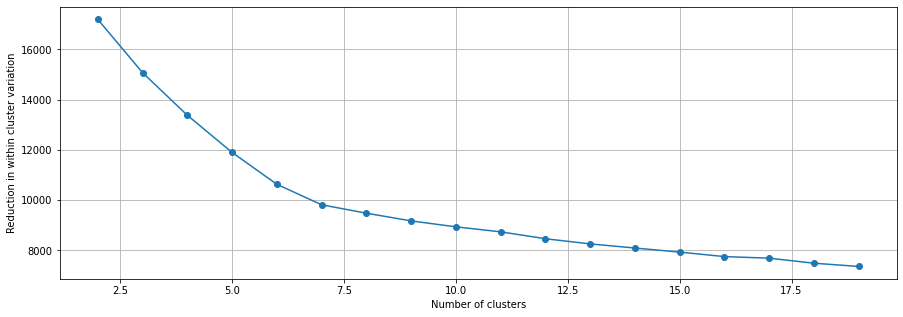

In [13]:
#scaling
X = preprocessing.scale(wine)

#plotting within cluster sum of squares
within_cluster_variance = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), within_cluster_variance, marker='o')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')

In [14]:
kmeans = KMeans(n_clusters=7, random_state=99)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
wine['cluster'] = y_kmeans

Kmeans cluster analysis is being used to identify clusters that have high and low values of wine quality out of 7 cluster groups. Below are the cluster centers (coordinates) of each cluster group.

In [15]:
#y_kmeans values represent the group the wine observation belongs to. in the first 5 wines, we can see all but the 4th wine belongs to group 2.
print(y_kmeans[0:5]) 

#centroids
print(kmeans.cluster_centers_)

[6 6 6 2 6]
[[-0.08563321 -0.03465216  0.41485574  4.96176756  0.29638789  1.75019116
   1.69583213  1.22500051 -0.3254596  -0.02378933 -0.363913   -0.02276114
   0.21588286]
 [ 0.08183134  0.01795477  1.14417813 -0.39939594  5.60473128 -0.070479
   0.47441556  0.18580277 -1.68735655  3.72060836 -0.88256287 -0.36069471
   1.9651904 ]
 [ 1.67061324 -0.55271849  1.21873454  0.11945302  0.0518725  -0.4871748
  -0.43225215  1.20480172 -0.9903133   0.22282352 -0.14131707  0.09022262
  -0.95032217]
 [ 0.26948285 -0.99410373  0.75981223 -0.10003304 -0.23944043 -0.34124429
  -0.53650464 -0.50480921 -0.25692503  0.46321425  1.01610484  1.03401828
   1.38208789]
 [-1.08152561  0.34034606 -0.90299778 -0.27067936 -0.41405687  0.27626746
  -0.16183846 -1.33049193  1.14766164 -0.12489479  1.17448696  0.50064417
  -1.53342469]
 [-0.12910383  0.02443255  0.0592166  -0.02075455 -0.03903652  1.00038381
   1.23335953  0.19936817 -0.09386096 -0.1706951  -0.57263508 -0.42546516
   0.79898537]
 [-0.42925018

The values of the wine quality variable (wine['quality']) range from 3 to 8. We can classify wine quality into three categories: "bad" = 3-4, "average" = 5-6, and "good" = 7-8.


Upon examining our dataset, we can see that most wines are of average category. There are 63 wines of bad category and 217 wines in the good category.

In [12]:
wine['quality'].value_counts().sort_index()
#Most wines are in the "average quality" range 5-6. 
#There are 63 wines in the "bad" quality category and 217 wines in the "good" quality category.

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

cluster 6 contains the most 'bad' wines (47/63) and cluster 3 contains the most 'good' wines (129/217).

Cluster group #6 contains the most bad quality wines (47/63 of all bad wines in the dataset) with a mean quality of 5.22. Cluster group #3 contains the most good wines (129/217) with a mean quality of 6.47.

In [16]:
pd.crosstab(wine['cluster'], wine['quality'])

quality,3,4,5,6,7,8
cluster,,,,,,
0,0,1,16,12,5,0
1,0,1,18,9,1,0
2,2,4,87,113,30,1
3,0,1,11,133,116,13
4,0,2,31,127,35,4
5,1,4,232,92,6,0
6,7,40,286,152,6,0


In [17]:
wine.groupby('cluster').mean()

#continuing our analysis from before, we can see that cluster0 average quality is the lowest(5.22) and cluster1 average quality is the highest(6.47).

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,8.170588,0.521618,0.351765,9.532353,0.101412,34.176471,102.235294,0.999058,3.260882,0.654118,10.035294,5.617647
1,8.462069,0.531034,0.493793,1.975862,0.351172,15.137931,62.068966,0.997097,3.050690,1.288621,9.482759,5.344828
2,11.227426,0.428882,0.508312,2.707173,0.089907,10.780591,32.253165,0.999020,3.158270,0.695907,10.272433,5.708861
3,8.788686,0.349872,0.418942,2.397810,0.076201,12.306569,28.824818,0.995794,3.271460,0.736642,11.505474,6.470803
4,6.437186,0.588744,0.095126,2.157286,0.067985,18.763819,41.145729,0.994236,3.488241,0.636985,11.674204,6.040201
5,8.094925,0.532194,0.282507,2.509552,0.085630,26.335821,87.026866,0.997123,3.296627,0.629224,9.812935,5.292537
6,7.572505,0.647444,0.118493,2.259776,0.085183,10.793279,32.875764,0.996761,3.363971,0.587475,9.883062,5.224033


In [18]:
wine.groupby('cluster').mean().sort_values('quality', ascending=False)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
3,8.788686,0.349872,0.418942,2.397810,0.076201,12.306569,28.824818,0.995794,3.271460,0.736642,11.505474,6.470803
4,6.437186,0.588744,0.095126,2.157286,0.067985,18.763819,41.145729,0.994236,3.488241,0.636985,11.674204,6.040201
2,11.227426,0.428882,0.508312,2.707173,0.089907,10.780591,32.253165,0.999020,3.158270,0.695907,10.272433,5.708861
0,8.170588,0.521618,0.351765,9.532353,0.101412,34.176471,102.235294,0.999058,3.260882,0.654118,10.035294,5.617647
1,8.462069,0.531034,0.493793,1.975862,0.351172,15.137931,62.068966,0.997097,3.050690,1.288621,9.482759,5.344828
5,8.094925,0.532194,0.282507,2.509552,0.085630,26.335821,87.026866,0.997123,3.296627,0.629224,9.812935,5.292537
6,7.572505,0.647444,0.118493,2.259776,0.085183,10.793279,32.875764,0.996761,3.363971,0.587475,9.883062,5.224033


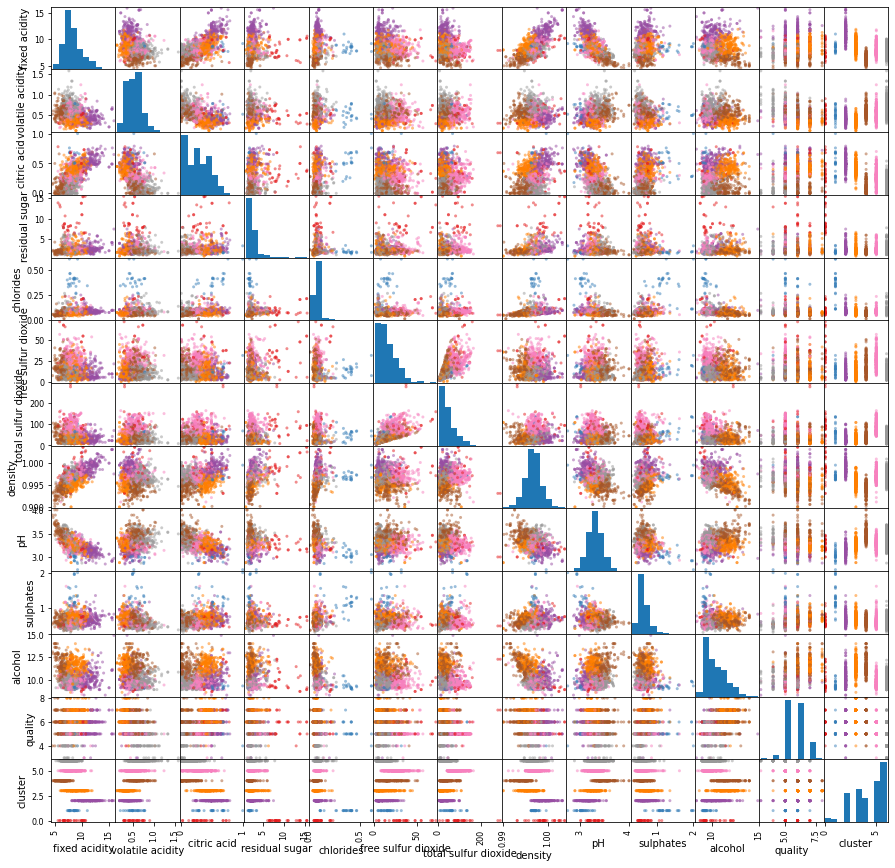

In [19]:
g = pd.plotting.scatter_matrix(wine, c=kmeans.labels_, cmap='Set1', figsize = (15,15))

**The largest influences on wine quality seem to be low volatile acidity and high alcohol content.**

The other variables do not indicate a dramatic relationship with quality, but some show more subtle differences in quality. For example, sulphates; cluster6 had the lowest value for this, but cluster4 had a slightly higher average sulphates value. Cluster4 was second place in average quality. It could be said that having greater sulphates would be more likely to be present in higher quality wine, but it doesn't necesarily "make" the wine higher quality. This is because cluster1 has the highest sulphates level, but is still closer to the lowerend in average quality ranking.

The data could also be skewed depending on the type of red wines since different wines may have different average compositions alltogether. To get a clearer answer and improve this research, we would run this analysis separately for each type of wine as well (merlot, bordeaux, pinot noir, ..).

###Hierarchical Cluster Analysis

Using Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality.

What characteristics are most important to making a good wine according to this analysis?

In [20]:
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

In [21]:
row_clusters = linkage(pdist(wine, metric='euclidean'), method='complete')

In [22]:
print(row_clusters)

[[0.00000000e+00 4.00000000e+00 0.00000000e+00 2.00000000e+00]
 [7.87000000e+02 7.88000000e+02 0.00000000e+00 2.00000000e+00]
 [7.85000000e+02 7.86000000e+02 0.00000000e+00 2.00000000e+00]
 ...
 [3.19000000e+03 3.19200000e+03 1.02433541e+02 1.48500000e+03]
 [3.19300000e+03 3.19400000e+03 1.69309868e+02 1.59700000e+03]
 [3.10300000e+03 3.19500000e+03 2.85231569e+02 1.59900000e+03]]


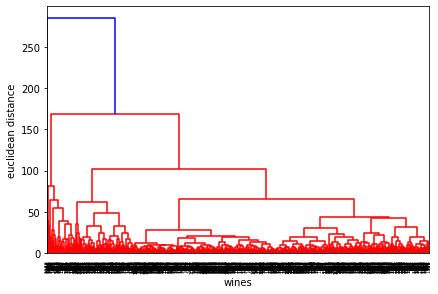

In [23]:
row_dendr = dendrogram(row_clusters)

plt.tight_layout()
plt.xlabel('wines')
plt.ylabel('euclidean distance')
plt.show()

In [24]:
ac = AgglomerativeClustering(n_clusters=7,   # note that we select the clusters
                             affinity='euclidean', 
                             linkage='complete', )
labels = ac.fit_predict(X)    # extract cluster labels for each observation in data
wine['hierarchy cluster'] = labels
wine['hierarchy cluster'].describe()

count    1599.000000
mean        4.807380
std         1.084846
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         6.000000
Name: hierarchy cluster, dtype: float64

In [25]:
pd.crosstab(wine['hierarchy cluster'], wine['quality'])
#how many bad how many good

quality,3,4,5,6,7,8
hierarchy cluster,,,,,,
0,0,2,33,10,1,0
1,0,0,1,4,2,0
2,0,1,23,14,1,0
3,0,1,1,0,0,0
4,7,30,67,20,0,0
5,3,17,527,463,162,14
6,0,2,29,127,33,4


In [26]:
wine.groupby('hierarchy cluster').mean().sort_values('quality', ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
hierarchy cluster,,,,,,,,,,,,,
1,7.200000,0.250000,0.457143,3.314286,0.054143,38.214286,176.285714,0.991896,3.070000,0.490000,11.842857,6.142857,3.000000
6,6.441538,0.593077,0.091949,2.092821,0.067477,18.866667,41.128205,0.994207,3.488410,0.637641,11.679829,6.041026,4.030769
5,8.730354,0.490287,0.312580,2.393297,0.083247,15.160202,45.489882,0.997088,3.283212,0.651467,10.290332,5.679595,4.235245
2,7.771795,0.522949,0.314103,8.792308,0.096923,30.564103,93.794872,0.998697,3.294872,0.643590,9.942735,5.384615,1.538462
0,8.432609,0.547065,0.393478,2.350000,0.239391,19.108696,80.434783,0.997409,3.106739,1.192174,9.571739,5.217391,2.347826
4,7.536290,0.795282,0.075242,2.690323,0.093371,10.858871,29.233871,0.996864,3.400323,0.554597,10.118414,4.806452,5.983871
3,8.450000,0.465000,0.880000,2.600000,0.610500,20.000000,57.000000,0.998200,2.900000,1.630000,9.400000,4.500000,1.000000


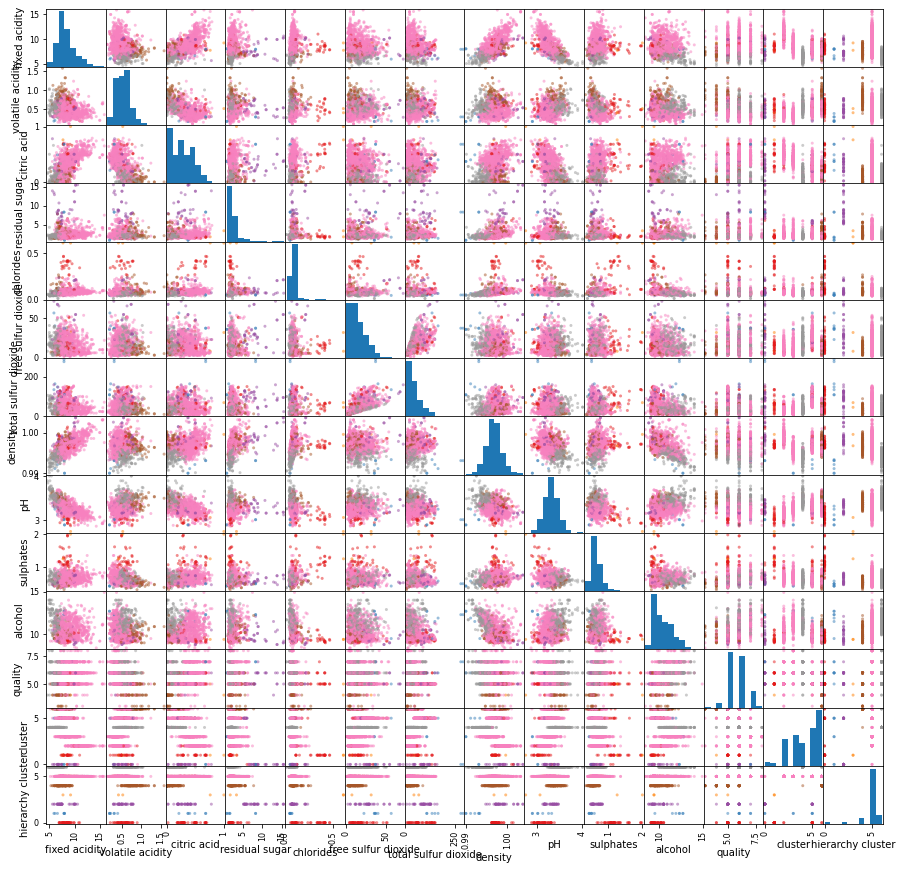

In [27]:
g = pd.plotting.scatter_matrix(wine, c=ac.labels_, cmap='Set1', figsize = (15,15))

**Using the hierarchical clusters, high quality wines are associated with low sulfates, extremely high total sulfur dioxide, high free sulfur dioxide, and low volatile acidity.**


This differs from kmeans which was primary focused on low volatile acidity and high alcohol content. Although alcohol content in agglomerative cluster is generally higher in higher quality wines, it is not a prevalent as it was in kmeans clustering.


This analysis also has a large amount of doubt in it though. Cluster2 accounts for more than 75% of the wines. Cluster4 is has the highest average quality of wine but only holds 3 observations. I think that if I used less clusters it would be easier to tell which variables can be seen as characteristics of good/bad wine. 

###Dimensionality reduction (PCA)

Using Principal Components Analysis to reduce the dimensions of the wines data. How much of the variation in the data is explained by the first two principal components? 

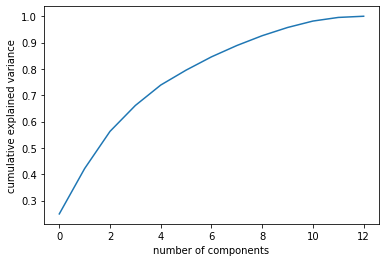

In [28]:
from sklearn.decomposition import PCA
#Evaluating best n_components
#"Use Principal Components Analysis to reduce the dimensions of your data."
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [32]:
pca70 = PCA(0.70).fit(X)
print(pca70.n_components_)

pca80 = PCA(0.80).fit(X)
print(pca80.n_components_) 

pca95 = PCA(0.95).fit(X)
print(pca95.n_components_)

#70% of variance explained with 5 PCA vectors
#80% of variance explained with 7 PCA vectors
#95% of variance explained with 10 PCA vectors

5
7
10


In [30]:
pca = PCA(n_components=9)
pca.fit(X)
pca.explained_variance_ratio_.sum()

0.9261276638258895

In [33]:
 #How much of the variation in your data is explained by the first two principal components?
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [34]:
pca.explained_variance_ratio_.sum()
#Using the two best principal components (n_components=2),
#it explains 44.69% of the dataset's variance

0.4215286973779076

From the PCA output, we could reduce the dimensionality by three variables while still explaining 95% of variance using 10 variables total. We could also reduce half the dimensionality and still be able to explain roughly 80% of variance (7 out of 12 variables).

The first two components account for 42.15% of the dataset's variance.

We could use the two principal components in supervised learning as regressors to predict another variable for wines. For example, we could plug in the two components with the highest explanatory variance of wine clusters to see which clusters are associated with (using the question's example) higher prices.